In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

### Define Camera Configuration

In [2]:
# define parameters for the image plane
f = 2
img_size = (7, 7)

# Define camera 1 configuration

angles = [np.pi/2]
order = 'x'
offset1 = np.array([-6, 0, 0])

R1 = create_rotation_transformation_matrix(angles, order)
R1_ = np.identity(4)
R1_[:3, :3] = R1
T1_ = create_translation_matrix(offset1)

# Define camera 2 configuration

angles = [np.pi/2]
order = 'x'
offset2 = np.array([6, 0, 0])

R2 = create_rotation_transformation_matrix(angles, order)
R2_ = np.identity(4)
R2_[:3, :3] = R2
T2_ = create_translation_matrix(offset2)

### Plot the setup

In [3]:
# define the world point
point = np.array([[2, -8, 4]])

In [4]:
# create and transform camera 1
xx1, yy1, Z1 = create_image_grid(f, img_size)
pt1_h = convert_grid_to_homogeneous(xx1, yy1, Z1, img_size)
pt1_h_transformed = T1_ @ R1_ @ pt1_h
xxt1, yyt1, Zt1 = convert_homogeneous_to_grid(pt1_h_transformed, img_size)

# create and transform camera 2
xx2, yy2, Z2 = create_image_grid(f, img_size)
pt2_h = convert_grid_to_homogeneous(xx2, yy2, Z2, img_size)
pt2_h_transformed = T2_ @ R2_ @ pt2_h
xxt2, yyt2, Zt2 = convert_homogeneous_to_grid(pt2_h_transformed, img_size)

Text(0.5, 0, 'Z-axis')

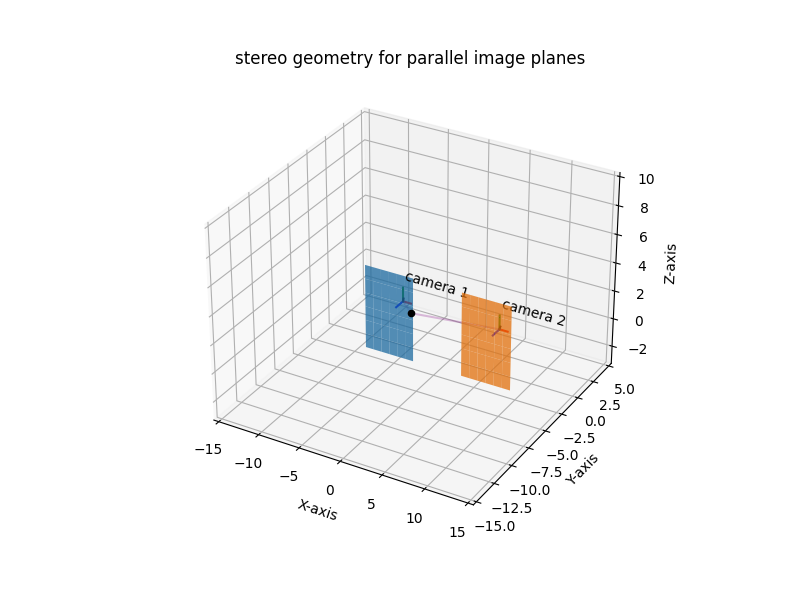

In [5]:
# define axis and figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# set limits
ax.set(xlim=(-15, 15), ylim=(-15, 5), zlim=(-3, 10))

# plot both the camera centers
ax = pr.plot_basis(ax, R1, offset1, label="camera 1")
ax = pr.plot_basis(ax, R2, offset2, label="camera 2")

# plot both the image planes
ax.plot_surface(xxt1, yyt1, Zt1, alpha=0.75)
ax.plot_surface(xxt2, yyt2, Zt2, alpha=0.75)

# plot baseline

# plot the world point
ax.scatter(*point[0], color="black")
ax.plot(*make_line(point, offset1), color="purple", alpha=0.25)
ax.plot(*make_line(point, offset2), color="purple", alpha=0.25)

ax.set_title("stereo geometry for parallel image planes")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

### Computing projection of the point on the cameras

In [6]:
# create camera intrinsic matrix
K = compute_intrinsic_parameter_matrix(f, 0, 1, 0, 0)

# compute projection for camera 1
E1 = np.linalg.inv(T1_ @ R1_)
E1_ = E1[:-1, :]
M1 = K @ E1_

proj_point1 = compute_world2img_projection(point.reshape(3, -1), M1, is_homogeneous=False)

# compute projection for camera 2
E2 = np.linalg.inv(T2_ @ R2_)
E2_ = E2[:-1, :]
M2 = K @ E2_

proj_point2 = compute_world2img_projection(point.reshape(3, -1), M2, is_homogeneous=False)

### Plot the projected points and the epipolar lines

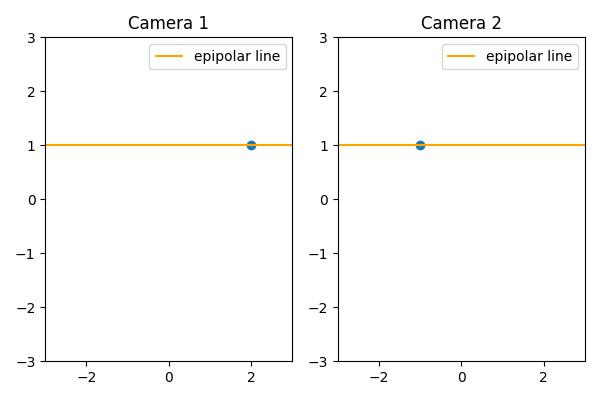

In [7]:
h, w = img_size
nrows = 1
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4))

# plot projection 1
ax1 = axes[0]
ax1.set(xlim = (-(h // 2), w // 2), ylim = (-(h // 2), w // 2))
ax1.set_title("Camera 1")
ax1.scatter(*proj_point1.reshape(-1))

y = proj_point1.reshape(-1)[1]
ax1.hlines(y, -3, 3, color="orange", label="epipolar line")

# plot projection 2
ax2 = axes[1]
ax2.set(xlim = (-(h // 2), w // 2), ylim = (-(h // 2), w // 2))
ax2.set_title("Camera 2")
ax2.scatter(*proj_point2.reshape(-1))

ax2.hlines(y, -3, 3, color="orange", label="epipolar line")

ax1.legend()
ax2.legend()

plt.tight_layout()